In [1]:
!pip install numpy==1.25.2 scipy==1.11.4 scikit-learn==1.2.2 joblib


In [2]:

import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)


1.2.2
0.10.1


In [3]:
# Import necessary libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('/content/FastagFraudDetection.csv')

In [5]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [7]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(1)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud


In [11]:
df['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [12]:
df['TollBoothID'].unique()

array(['A-101', 'B-102', 'D-104', 'C-103', 'D-105', 'D-106'], dtype=object)

In [13]:
df['Lane_Type'].unique()

array(['Express', 'Regular'], dtype=object)

In [14]:
df['Vehicle_Dimensions'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [15]:
df['Fraud_indicator'].unique()

array(['Fraud', 'Not Fraud'], dtype=object)

# Visualizations

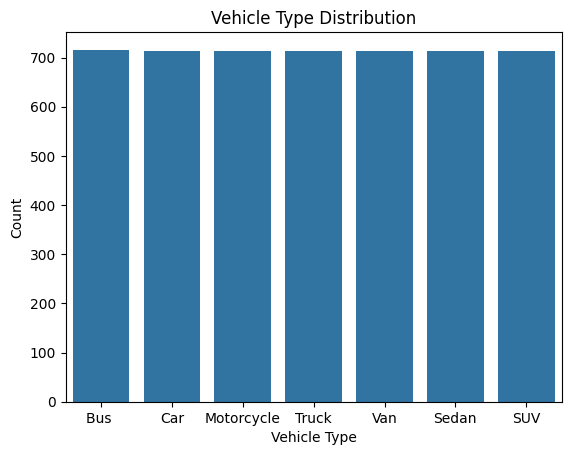

In [16]:
sns.countplot(data=df, x='Vehicle_Type')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

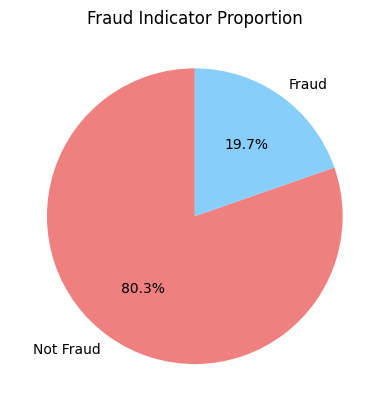

In [17]:
fraud_counts = df['Fraud_indicator'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraud Indicator Proportion')
plt.show()

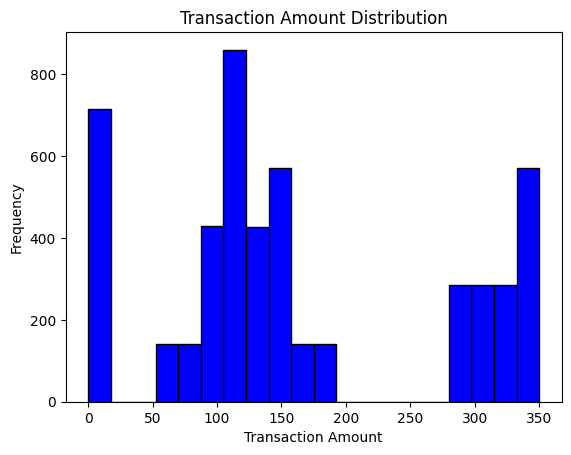

In [18]:
plt.hist(df['Transaction_Amount'], bins=20, color='blue', edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

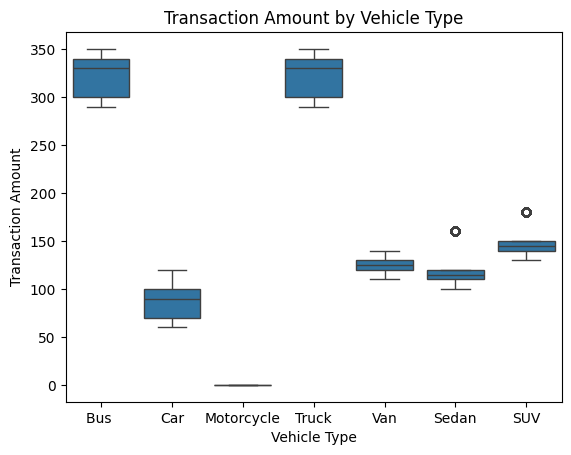

In [19]:
sns.boxplot(data=df, x='Vehicle_Type', y='Transaction_Amount')
plt.title('Transaction Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-20-360a2268f1fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Vehicle_Type', palette='viridis')


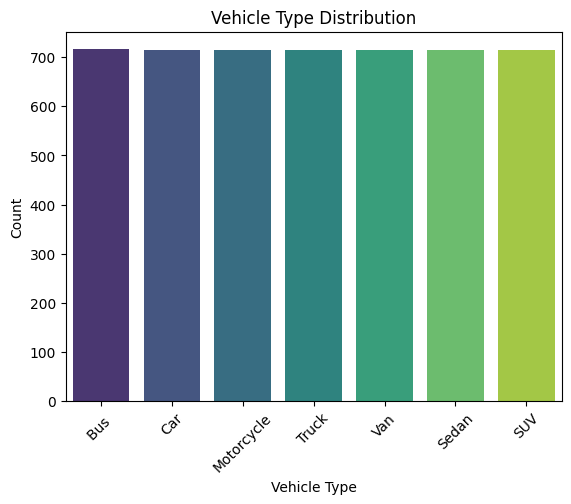

In [20]:
# Countplot for Vehicle_Type
sns.countplot(data=df, x='Vehicle_Type', palette='viridis')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.show()

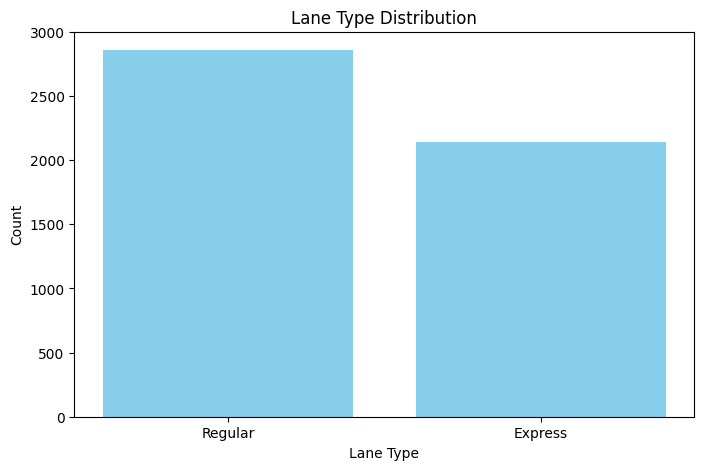

In [21]:
# Count the occurrences of each lane type
lane_type_counts = df['Lane_Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(lane_type_counts.index, lane_type_counts.values, color='skyblue')
plt.title('Lane Type Distribution')
plt.xlabel('Lane Type')
plt.ylabel('Count')
plt.show()

<ipython-input-22-277f22ce4eba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Vehicle_Dimensions', palette='viridis')


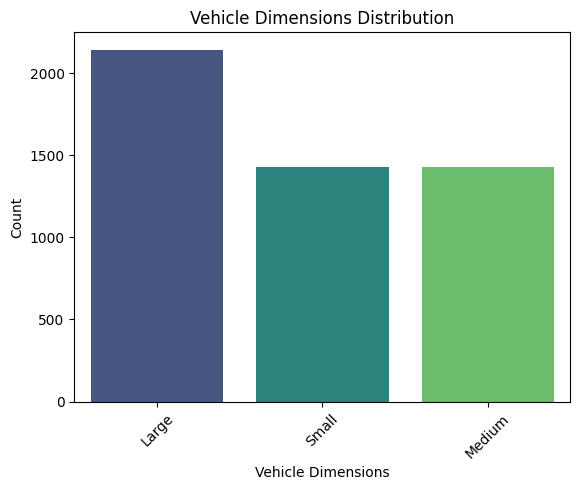

In [22]:
# Countplot for Vehicle_Dimensions
sns.countplot(data=df, x='Vehicle_Dimensions', palette='viridis')
plt.title('Vehicle Dimensions Distribution')
plt.xlabel('Vehicle Dimensions')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.show()

In [23]:
import pandas as pd

# Convert Timestamp to datetime with infer_datetime_format=True
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='coerce')


<ipython-input-23-b12c19e3224a>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='coerce')


# **Feature Creation**

In [24]:
df['Hour'] = df['Timestamp'].dt.hour

In [25]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()


In [26]:
df['Month'] = df['Timestamp'].dt.month_name()


In [27]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,Friday,January
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,Saturday,January
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,18,Sunday,January
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2,Monday,January
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,6,Tuesday,January


<ipython-input-28-533ab85f57f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='viridis')


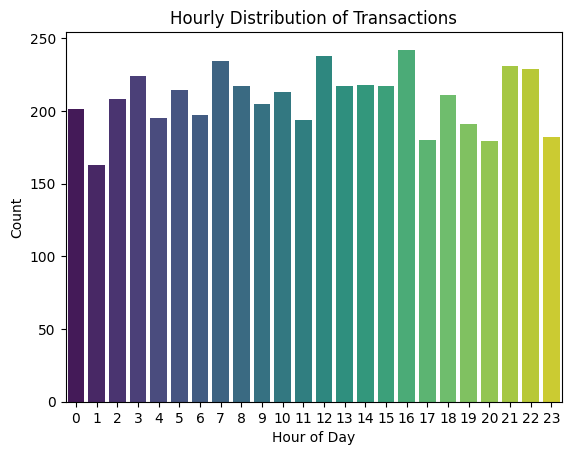

In [28]:

# Countplot for Hour
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Hourly Distribution of Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


<ipython-input-29-2153fc74198c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DayOfWeek', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


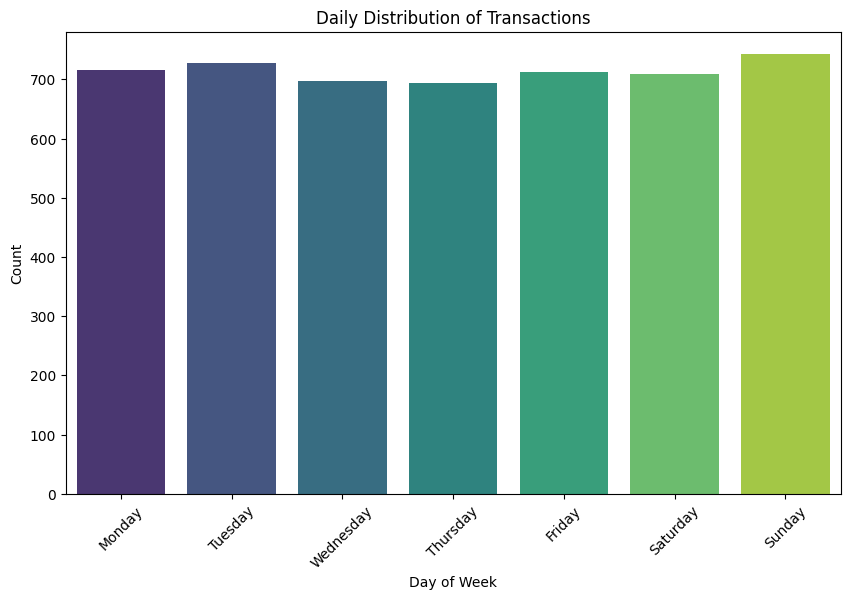

In [29]:
# Countplot for Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Distribution of Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


<ipython-input-30-0b302c0ded00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


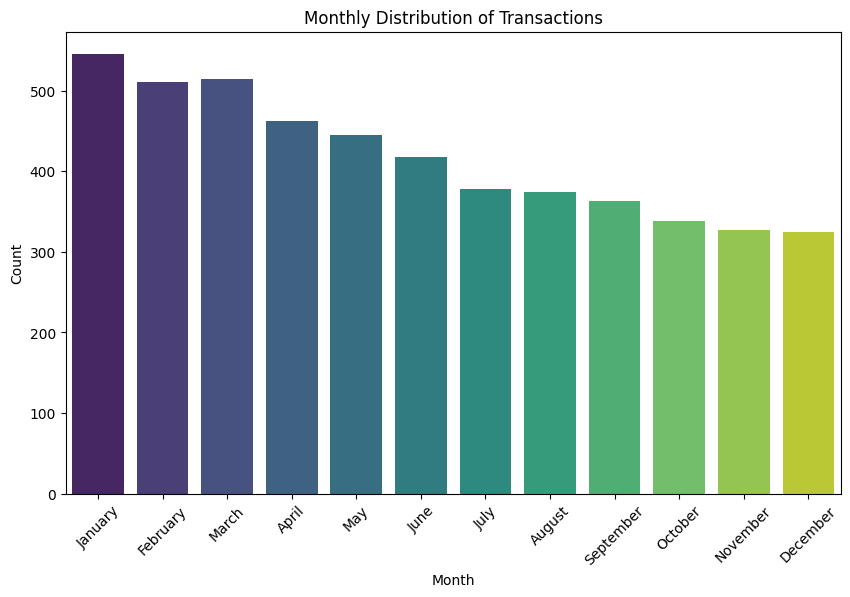

In [30]:
# Countplot for Month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Distribution of Transactions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

# **Normalization and Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# **Encoding Categorical Variables**

In [32]:
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'DayOfWeek', 'Month'], drop_first=True)


In [33]:
df.head(1)

,Transaction_ID,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,1.680364,-0.199689,"13.059816123454882, 77.77068662374292",-0.171802,KA11AB1234,Fraud,...,False,False,True,False,False,False,False,False,False,False


In [34]:
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})


In [35]:
print(df.columns)

Index(['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID',
       'Transaction_Amount', 'Amount_paid', 'Geographical_Location',
       'Vehicle_Speed', 'Vehicle_Plate_Number', 'Fraud_indicator', 'Hour',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'Vehicle_Dimensions_Medium',
       'Vehicle_Dimensions_Small', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September'],
      dtype='object')


In [36]:
print(df.dtypes)


Transaction_ID                        int64
Timestamp                    datetime64[ns]
FastagID                             object
TollBoothID                          object
Transaction_Amount                  float64
Amount_paid                         float64
Geographical_Location                object
Vehicle_Speed                       float64
Vehicle_Plate_Number                 object
Fraud_indicator                       int64
Hour                                  int32
Vehicle_Type_Car                       bool
Vehicle_Type_Motorcycle                bool
Vehicle_Type_SUV                       bool
Vehicle_Type_Sedan                     bool
Vehicle_Type_Truck                     bool
Vehicle_Type_Van                       bool
Lane_Type_Regular                      bool
Vehicle_Dimensions_Medium              bool
Vehicle_Dimensions_Small               bool
DayOfWeek_Monday                       bool
DayOfWeek_Saturday                     bool
DayOfWeek_Sunday                

In [37]:
# Drop unnecessary columns including 'Timestamp'
columns_to_drop = [
    'Timestamp', 'TollBoothID', 'Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Geographical_Location'
]
df = df.drop(columns=columns_to_drop, errors='ignore')


In [38]:
# Handling class imbalance using SMOTE
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']



In [39]:
# Create dummy data (replace with your actual data loading code)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

In [40]:
# Apply SMOTE to handle class imbalance
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# **Train the model**

In [41]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)



# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [44]:
# Get the best model
best_model = grid_search.best_estimator_



# Make predictions on the test set
y_pred = best_model.predict(X_test)

# **Evaluate the model**

In [45]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9108910891089109
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       160
           1       0.88      0.94      0.91       143

    accuracy                           0.91       303
   macro avg       0.91      0.91      0.91       303
weighted avg       0.91      0.91      0.91       303

Confusion Matrix:
[[142  18]
 [  9 134]]


In [46]:
# Save the best model
joblib.dump(best_model, 'fraud_detection_model.pkl')

# Save the feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]  # Replace this with actual feature names if available
with open('feature_names.txt', 'w') as f:
    for item in feature_names:
        f.write("%s\n" % item)


In [47]:
# Download the files
from google.colab import files
files.download('fraud_detection_model.pkl')
files.download('feature_names.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>